## Live Session Coding  10/21/24

####  Example Problem:

Write a function p13 taking an n x k array and returns a tuple of arrays with the minimum, median, and maximum values of each row. To be clear, the function should return a tuple of three 1-dimensional arrays, each of length n.

In [1]:
import numpy as np

# Solution

arr = np.array([              # not the same example I gave during the session
    [3, 5, 1],
    [8, 2, 6],
    [4, 7, 9],
    [2, 3, 4],
])

def p13(arr):
    return (np.min(arr,axis=1),np.median(arr,axis=1),np.max(arr,axis=1))

p13(arr)

(array([1, 2, 4, 2]), array([3., 6., 7., 3.]), array([5, 8, 9, 4]))

The main confusion is the axis parameter.  Think of it this way:

    - rows => axis 0
    - columns => axis 1
    - etc
    
They are numbered in the same order as returned by `np.shape(...)`.
    
The best way to think about it is to consider how you would enumerate all the  elements in the array. 
The standard enumeration is "row major" order, meaning the row is the outer loop, changing more slowly.


In [2]:
(n,k) = np.shape(arr)           # best way to find the length of the dimensions
print(n,k)


for r in range(n):
    print()
    for c in range(k):
        print(f'arr[{r}][{c}] = {arr[r][c]}\t',end='')
    print('  <= Find the min over these values',end='')

4 3

arr[0][0] = 3	arr[0][1] = 5	arr[0][2] = 1	  <= Find the min over these values
arr[1][0] = 8	arr[1][1] = 2	arr[1][2] = 6	  <= Find the min over these values
arr[2][0] = 4	arr[2][1] = 7	arr[2][2] = 9	  <= Find the min over these values
arr[3][0] = 2	arr[3][1] = 3	arr[3][2] = 4	  <= Find the min over these values


In numpy, there is essentially a similar enumeration hidden in the implementation, and here is how
to remember how `axis` works:

     The axis parameter is the fastest-changing dimension, or the innermost for loop
     
So this enumeration corresponds to 

for each row      (axis 0)

     Calculate the min over the columns in that row      (axis 1)
     
     
#### Here we do the same problem three different ways:

In [3]:
import numpy as np

# Sample Array
arr = np.array([
    [3, 5, 1],
    [8, 2, 6],
    [4, 7, 9],
    [2, 3, 4]
])

# Approach 1: Using Two Nested For Loops (Manual Min Calculation)
min_values0 = []

# Outer loop: iterate over each row
for row in arr:
    min_val = float('inf')  # Start with a very large number
    # Inner loop: iterate over each element in the row
    for value in row:
        if value < min_val:
            min_val = value
    min_values0.append(min_val)

print("Min values (using two for loops):", min_values0)


# Approach 2: Using a Single For Loop and Python's `min` Function
min_values1 = []

# Outer loop: iterate over each row
for row in arr:
    min_values1.append(min(row))  # Use Python's built-in min function on the row

print("Min values (using a for loop and min over rows):", min_values1)


# Approach 3: Using NumPy's `np.min` with `axis=1`
min_values2 = np.min(arr, axis=1)

print("Min values (using np.min with axis=1):", min_values2.tolist())


Min values (using two for loops): [1, 2, 4, 2]
Min values (using a for loop and min over rows): [1, 2, 4, 2]
Min values (using np.min with axis=1): [1, 2, 4, 2]


#### Notice how easy it is to do the same thing taking the mins down the columns

This is just like using a "column major" ordering, with columns in the outer loop and rows on the inner loop. 

    for c in range(k):
        for r in range(n):
             pass

In [4]:
# Approach 4: Using NumPy's `np.min` with `axis=0`
min_values3 = np.min(arr, axis=0)

print("Min values (using np.min with axis=0):", min_values3.tolist())

Min values (using np.min with axis=0): [2, 2, 1]


### Example for Live Coding 10/21/24

The file `delhi_temperature.csv` contains the average daily temperature in Delhi, India from 1/1/1995 to 5/12/2020.

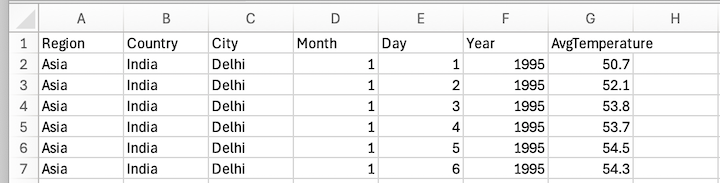


First, we're going to read just the average temperatures into a list, and then do some processing. 


In [5]:
# Reading the file using basic Python functions
file_path = 'delhi_temperature.csv'  # Replace with the path to your file

# Initialize a list to store the average temperatures
avg_temps = []

# Open the file and read the data
with open(file_path, 'r') as file:
    # Skip the header line
    header = file.readline()
    
    # Read each line in the file
    for line in file:
        # Split the line into components (assuming CSV format)
        parts = line.strip().split(',')
        # Extract the average temperature (assuming it's in the 7th column, index 5)
        avg_temp = (int(parts[3]), int(parts[4]), int(parts[5]), float(parts[6]))  # Convert to ints and float
        avg_temps.append(avg_temp)

# Print out the first 10 average temperatures as a sample
print(f'There are {len(avg_temps)} temperature values.')
print("First 10 temperatures:", avg_temps[:10])


There are 9265 temperature values.
First 10 temperatures: [(1, 1, 1995, 10.39), (1, 2, 1995, 11.17), (1, 3, 1995, 12.11), (1, 4, 1995, 12.06), (1, 5, 1995, 12.5), (1, 6, 1995, 12.39), (1, 7, 1995, 13.94), (1, 8, 1995, 13.11), (1, 9, 1995, 12.22), (1, 10, 1995, 11.33)]


### We want to do some basic manipulations of this data for exploratory data analysis

- Convert from Celsius to Fahrenheit
- Calculate overall average, min, and max over whole range

First 10 temperatures: [(1, 1, 1995, 50.702), (1, 2, 1995, 52.106), (1, 3, 1995, 53.798), (1, 4, 1995, 53.708), (1, 5, 1995, 54.5), (1, 6, 1995, 54.302), (1, 7, 1995, 57.092), (1, 8, 1995, 55.598), (1, 9, 1995, 53.996), (1, 10, 1995, 52.394)]
Mean Temperature: 76.94 °F
Minimum Temperature: 43.90 °F
Maximum Temperature: 103.69 °F


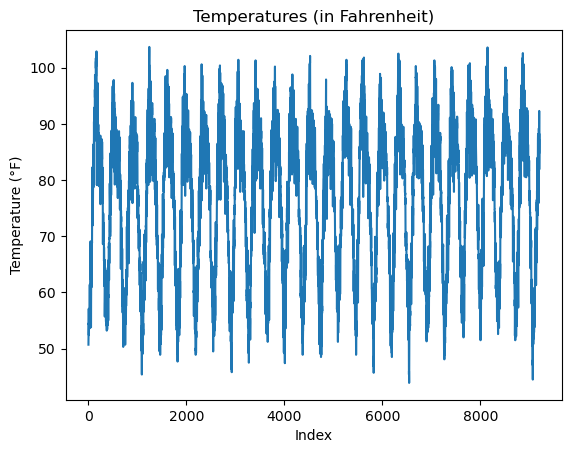

In [6]:
import matplotlib.pyplot as plt


# Convert temperatures to Fahrenheit
avg_temps_fahr = []
for k in range(len(avg_temps)):
    fahr_value = avg_temps[k][3] * 9/5 + 32
    if fahr_value > 0:
        avg_temps_fahr.append((avg_temps[k][0], avg_temps[k][1], avg_temps[k][2], fahr_value))

print("First 10 temperatures:", avg_temps_fahr[:10])
    
# Basic Statistics
total_temp = 0
min_temp = float('inf')
max_temp = float('-inf')


for entry in avg_temps_fahr:
    temperature = entry[3]
    total_temp += temperature
    if temperature < min_temp:
        min_temp = temperature
    if temperature > max_temp:
        max_temp = temperature
        

mean_temp = total_temp / len(avg_temps_fahr)

print(f"Mean Temperature: {mean_temp:.2f} °F")
print(f"Minimum Temperature: {min_temp:.2f} °F")
print(f"Maximum Temperature: {max_temp:.2f} °F")

just_temps = []
for k in range(len(avg_temps_fahr)):
    just_temps.append(avg_temps_fahr[k][3])
    
  
# Plot Bar Chart
plt.plot(range(len(just_temps)), just_temps)
plt.title("Temperatures (in Fahrenheit)")
plt.xlabel("Index")
plt.ylabel("Temperature (°F)")
# plt.xticks(range(len(temperatures)), [f"{entry[0]}/{entry[1]}/{entry[2]}" for entry in avg_temps_fahr], rotation=45)
plt.show()

### A More Pythonic Approach

Use list comprehensions and list functions!

Mean Temperature: 76.94 °F
Minimum Temperature: 43.90 °F
Maximum Temperature: 103.69 °F


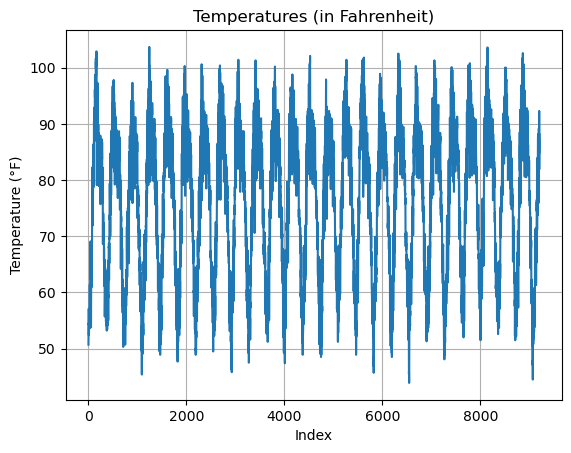

In [7]:
import matplotlib.pyplot as plt


# Convert temperatures to Fahrenheit using list comprehension
avg_temps_fahr = [(month, day, year, temp * 9/5 + 32) for month, day, year, temp in avg_temps if temp > 0]

# Extract all temperatures directly
just_temps = [entry[3] for entry in avg_temps_fahr]

# Calculate basic statistics using built-in functions
mean_temp = sum(just_temps) / len(just_temps)
min_temp = min(just_temps)
max_temp = max(just_temps)

print(f"Mean Temperature: {mean_temp:.2f} °F")
print(f"Minimum Temperature: {min_temp:.2f} °F")
print(f"Maximum Temperature: {max_temp:.2f} °F")

# Plot Line Chart
plt.plot(range(len(just_temps)), just_temps)
plt.title("Temperatures (in Fahrenheit)")
plt.xlabel("Index")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.show()


### Similarly in Numpy

Mean Temperature: 76.94 °F
Minimum Temperature: 43.90 °F
Maximum Temperature: 103.69 °F


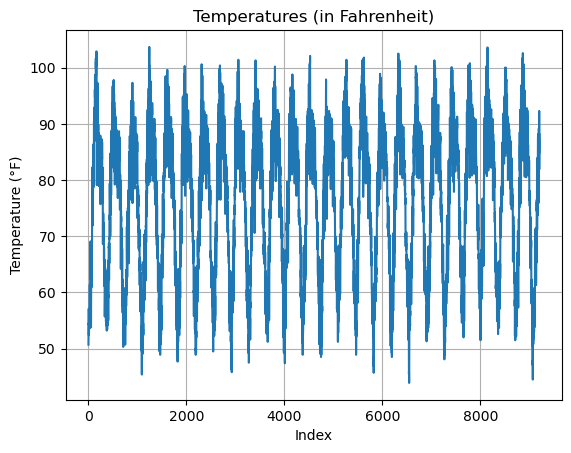

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Convert the temperatures to Fahrenheit using NumPy
avg_temps_array = np.array([entry[3] for entry in avg_temps if entry[3] > 0])
avg_temps_fahr = avg_temps_array * 9/5 + 32

# Calculate basic statistics using NumPy functions
mean_temp = np.mean(avg_temps_fahr)
min_temp = np.min(avg_temps_fahr)
max_temp = np.max(avg_temps_fahr)

print(f"Mean Temperature: {mean_temp:.2f} °F")
print(f"Minimum Temperature: {min_temp:.2f} °F")
print(f"Maximum Temperature: {max_temp:.2f} °F")

# Plot Line Chart
plt.plot(range(len(avg_temps_fahr)), avg_temps_fahr)
plt.title("Temperatures (in Fahrenheit)")
plt.xlabel("Index")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.show()


First 5 rows of the dataset:
  Region Country   City  Month  Day  Year  AvgTemp (C)
0   Asia   India  Delhi      1    1  1995        10.39
1   Asia   India  Delhi      1    2  1995        11.17
2   Asia   India  Delhi      1    3  1995        12.11
3   Asia   India  Delhi      1    4  1995        12.06
4   Asia   India  Delhi      1    5  1995        12.50

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9265 entries, 0 to 9264
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       9265 non-null   object 
 1   Country      9265 non-null   object 
 2   City         9265 non-null   object 
 3   Month        9265 non-null   int64  
 4   Day          9265 non-null   int64  
 5   Year         9265 non-null   int64  
 6   AvgTemp (C)  9265 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 506.8+ KB

Missing values per column:
Region         0
Country        0
City           0

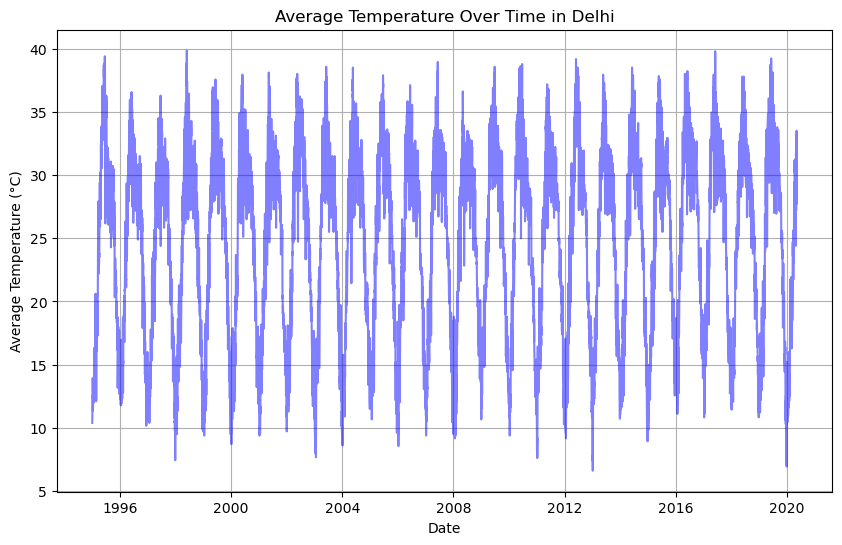

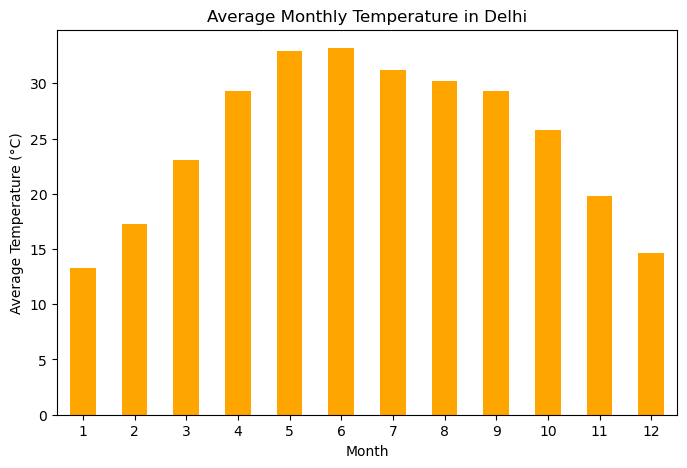

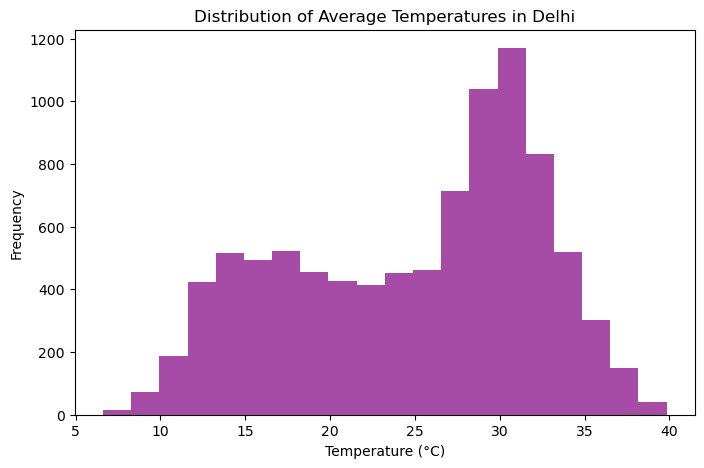

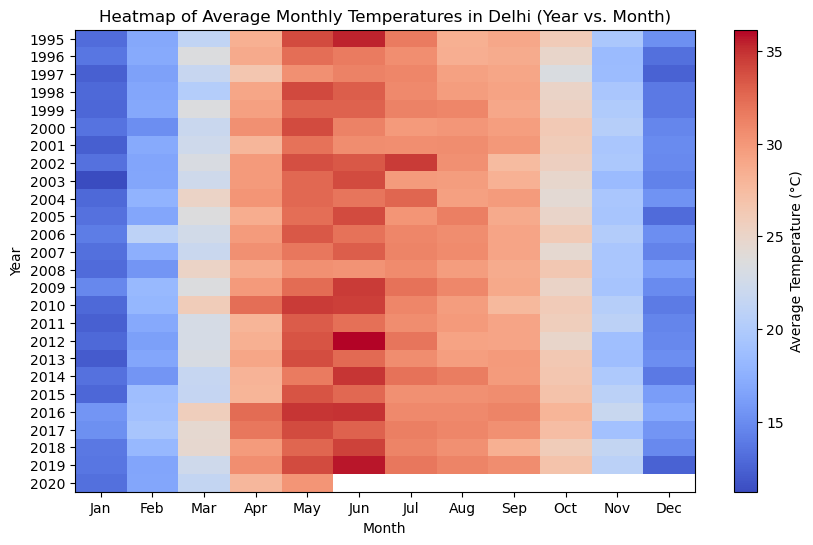

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Delhi-specific dataset
file_path = 'delhi_temperature.csv'  # Replace with the actual path to your extracted file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Basic info about the dataset (columns, data types, non-null counts)
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics:")
print(df.describe())

# Handling missing values (example: fill missing temperatures with the mean temperature)
df['AvgTemp (C)'].fillna(df['AvgTemp (C)'].mean(), inplace=True)

# **Remove temperatures less than 0°C**
df = df[df['AvgTemp (C)'] >= 0]

# Convert date columns (if not already done)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Line plot: Temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AvgTemp (C)'], color='blue', alpha=0.5)
plt.title('Average Temperature Over Time in Delhi')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

# Seasonal trends: Average temperature by month
monthly_avg_temp = df.groupby('Month')['AvgTemp (C)'].mean()

plt.figure(figsize=(8, 5))
monthly_avg_temp.plot(kind='bar', color='orange')
plt.title('Average Monthly Temperature in Delhi')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

# Distribution of average temperatures (Histogram)
plt.figure(figsize=(8, 5))
df['AvgTemp (C)'].hist(bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Average Temperatures in Delhi')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Heatmap: Average temperature by year and month
pivot_table = df.pivot_table(values='AvgTemp (C)', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Average Temperature (°C)')
plt.title('Heatmap of Average Monthly Temperatures in Delhi (Year vs. Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.show()
